# Importing Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/kaggle/input/carprice/car data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
df.tail()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [4]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [5]:
df.shape

(301, 9)

In [6]:
df.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Driven_kms         int64
Fuel_Type         object
Selling_type      object
Transmission      object
Owner              int64
dtype: object

In [7]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [8]:
df.duplicated().sum()

2

In [9]:
df.nunique()

Car_Name          98
Year              16
Selling_Price    156
Present_Price    148
Driven_kms       206
Fuel_Type          3
Selling_type       2
Transmission       2
Owner              3
dtype: int64

In [10]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [11]:
categorical_columns = ['Car_Name','Fuel_Type','Selling_type','Transmission']

for col in categorical_columns:
    
    print(f"Category in {col} is : {df[col].unique()}")

Category in Car_Name is : ['ritz' 'sx4' 'ciaz' 'wagon r' 'swift' 'vitara brezza' 's cross'
 'alto 800' 'ertiga' 'dzire' 'alto k10' 'ignis' '800' 'baleno' 'omni'
 'fortuner' 'innova' 'corolla altis' 'etios cross' 'etios g' 'etios liva'
 'corolla' 'etios gd' 'camry' 'land cruiser' 'Royal Enfield Thunder 500'
 'UM Renegade Mojave' 'KTM RC200' 'Bajaj Dominar 400'
 'Royal Enfield Classic 350' 'KTM RC390' 'Hyosung GT250R'
 'Royal Enfield Thunder 350' 'KTM 390 Duke ' 'Mahindra Mojo XT300'
 'Bajaj Pulsar RS200' 'Royal Enfield Bullet 350'
 'Royal Enfield Classic 500' 'Bajaj Avenger 220' 'Bajaj Avenger 150'
 'Honda CB Hornet 160R' 'Yamaha FZ S V 2.0' 'Yamaha FZ 16'
 'TVS Apache RTR 160' 'Bajaj Pulsar 150' 'Honda CBR 150' 'Hero Extreme'
 'Bajaj Avenger 220 dtsi' 'Bajaj Avenger 150 street' 'Yamaha FZ  v 2.0'
 'Bajaj Pulsar  NS 200' 'Bajaj Pulsar 220 F' 'TVS Apache RTR 180'
 'Hero Passion X pro' 'Bajaj Pulsar NS 200' 'Yamaha Fazer '
 'Honda Activa 4G' 'TVS Sport ' 'Honda Dream Yuga '
 'Bajaj Avenge

# Data Analysis

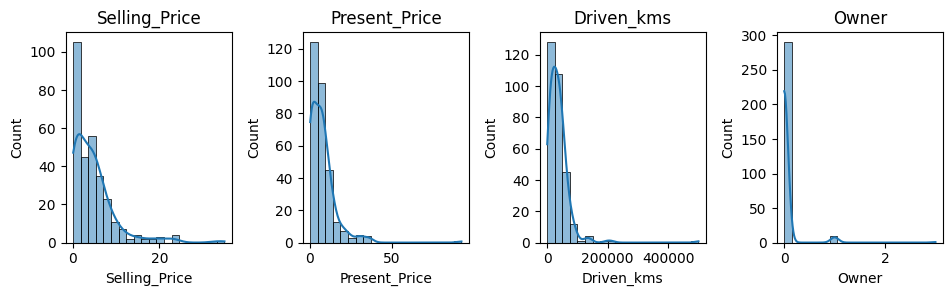

In [12]:
numerical_features = ['Selling_Price',
                      'Present_Price', 'Driven_kms', 
                      'Owner']

plt.figure(figsize=(12, 8))
for feature in numerical_features:
    plt.subplot(3, 5, numerical_features.index(feature) + 1)
    sns.histplot(data=df[feature], bins=20, kde=True)
    plt.title(feature)
plt.tight_layout()
plt.show()

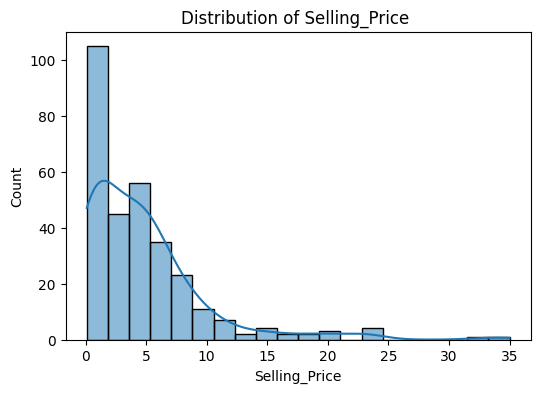

In [13]:
plt.figure(figsize=(6, 4))
sns.histplot(data=df['Selling_Price'], bins=20, kde=True)
plt.title('Distribution of Selling_Price ')
plt.show()

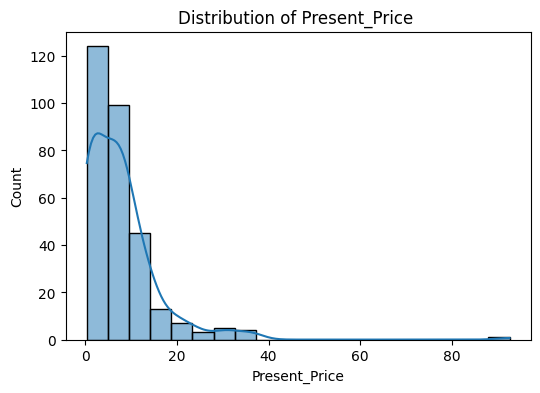

In [14]:
plt.figure(figsize=(6, 4))
sns.histplot(data=df['Present_Price'], bins=20, kde=True)
plt.title('Distribution of Present_Price ')
plt.show()

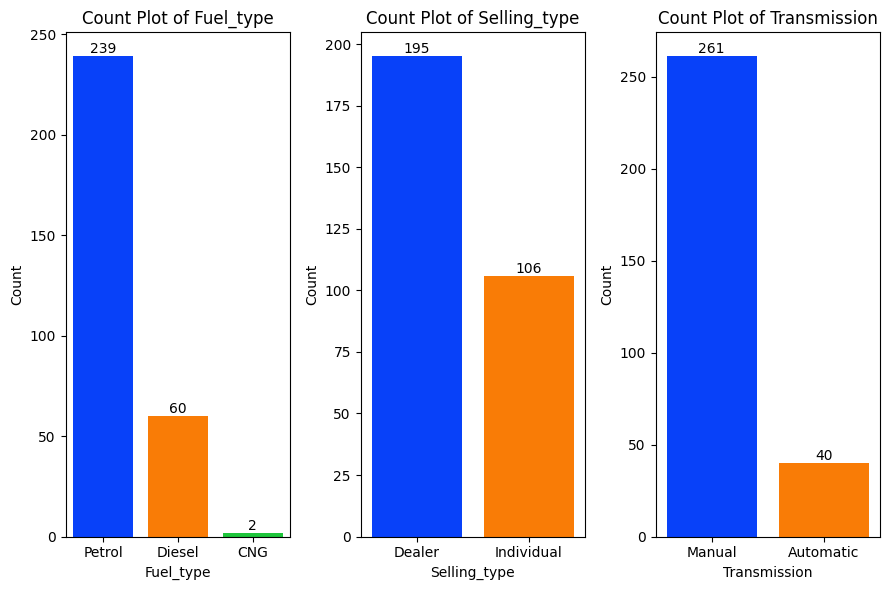

In [15]:
# Define the list of categorical columns to analyze
categorical_columns = [ 'Fuel_Type','Selling_type','Transmission']            
# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(9, 6))
axes = axes.ravel()  # Flatten the 2D array of axes

# Loop through each categorical column
for i, column in enumerate(categorical_columns):
    sns.countplot(x=df[column], data=df, palette='bright', ax=axes[i], saturation=0.95)
    for container in axes[i].containers:
        axes[i].bar_label(container, color='black', size=10)
    axes[i].set_title(f'Count Plot of {column.capitalize()}')
    axes[i].set_xlabel(column.capitalize())
    axes[i].set_ylabel('Count')

# Adjust layout and show plots
plt.tight_layout()
plt.show()

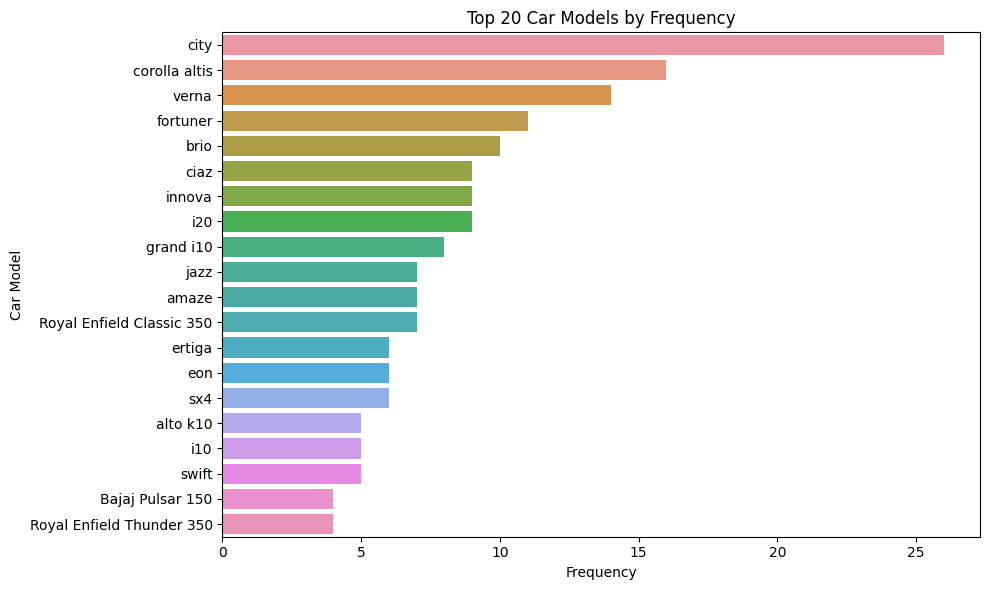

In [16]:
n = 20  # Number of top car models to plot
top_car_models = df['Car_Name'].value_counts().head(n)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_car_models.values, y=top_car_models.index)
plt.title(f'Top {n} Car Models by Frequency')
plt.xlabel('Frequency')
plt.ylabel('Car Model')
plt.tight_layout()
plt.show()

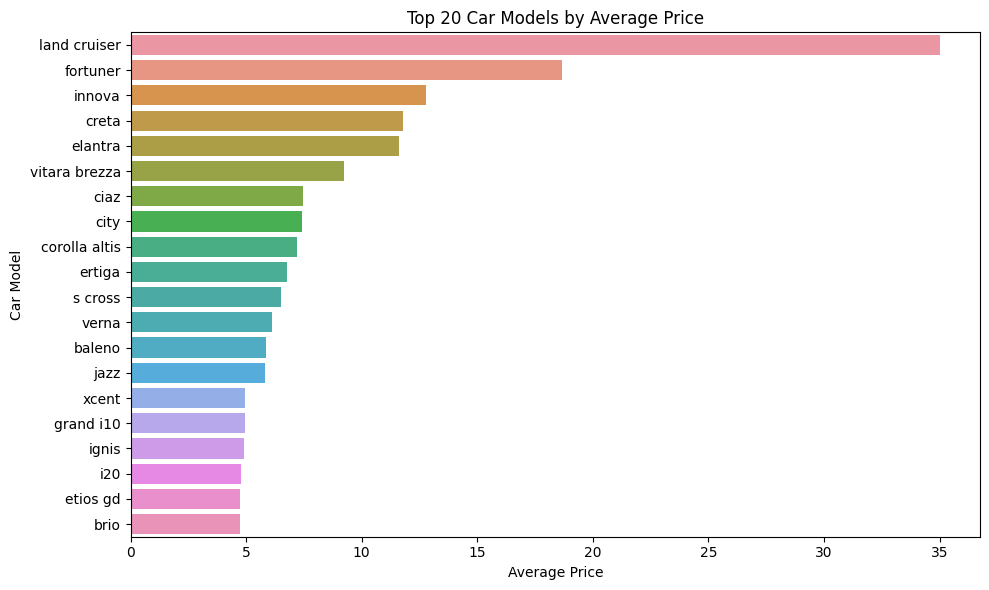

In [17]:
# Calculate average price for each car model
avg_prices_by_car = df.groupby('Car_Name')['Selling_Price'].mean().sort_values(ascending=False)

# Plot top N car models by average price
n = 20  # Number of top car models to plot
top_car_models = avg_prices_by_car.head(n)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_car_models.values, y=top_car_models.index)
plt.title(f'Top {n} Car Models by Average Price')
plt.xlabel('Average Price')
plt.ylabel('Car Model')
plt.tight_layout()
plt.show()

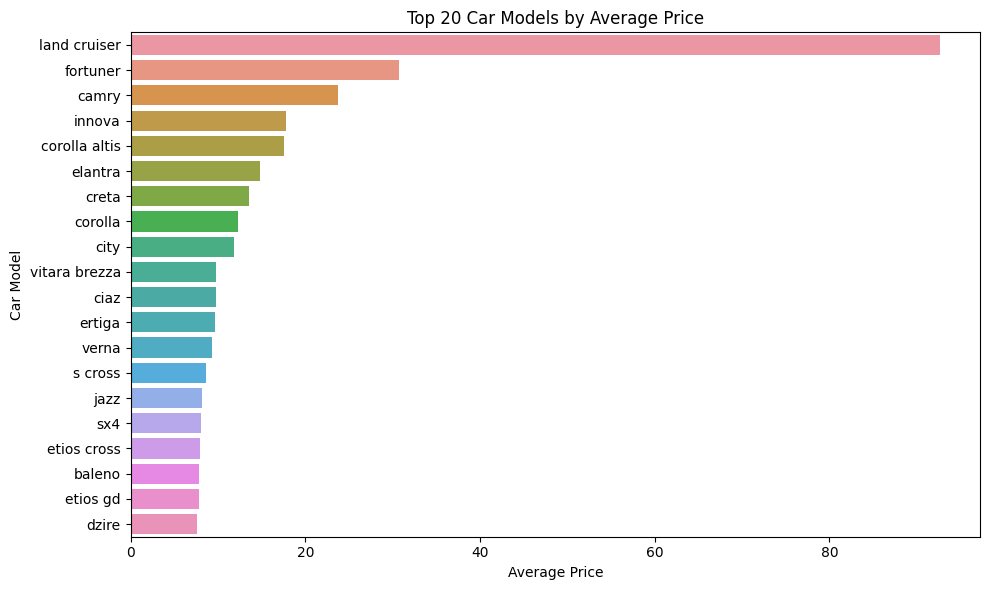

In [18]:
# Calculate average price for each car model
avg_prices_by_car = df.groupby('Car_Name')['Present_Price'].mean().sort_values(ascending=False)

# Plot top N car models by average price
n = 20  # Number of top car models to plot
top_car_models = avg_prices_by_car.head(n)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_car_models.values, y=top_car_models.index)
plt.title(f'Top {n} Car Models by Average Price')
plt.xlabel('Average Price')
plt.ylabel('Car Model')
plt.tight_layout()
plt.show()

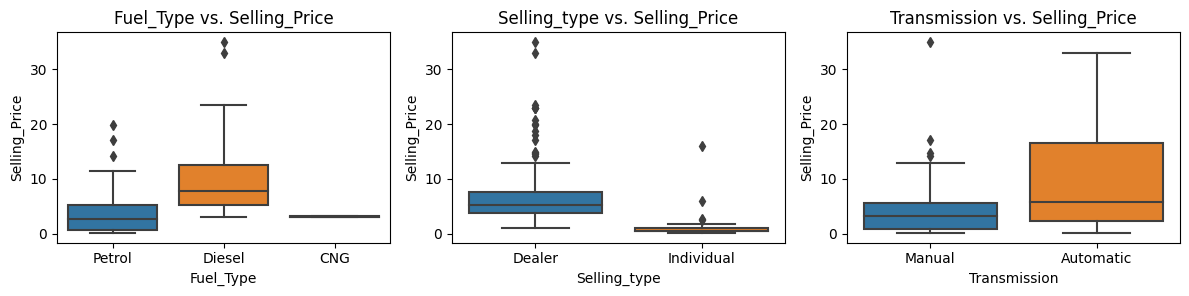

In [19]:
# Categorical Feature vs. Price
plt.figure(figsize=(12, 8))
for feature in categorical_columns:
    plt.subplot(3, 3, categorical_columns.index(feature) + 1)
    sns.boxplot(data=df, x=feature, y='Selling_Price')
    plt.title(f'{feature} vs. Selling_Price')
plt.tight_layout()
plt.show()

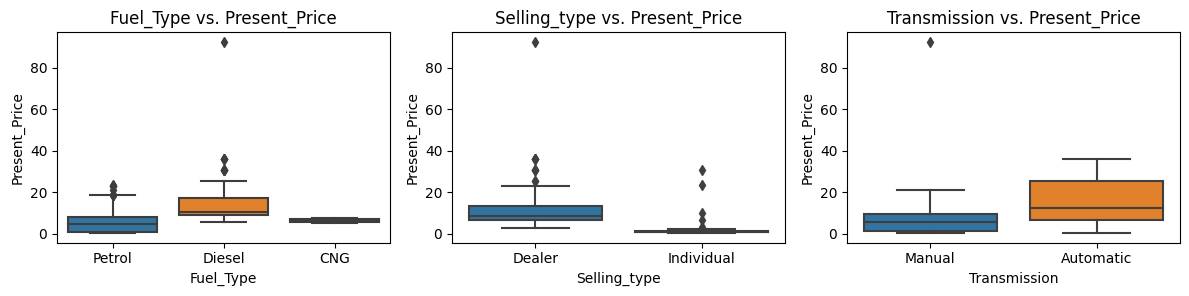

In [20]:
# Categorical Feature vs. Price
plt.figure(figsize=(12, 8))
for feature in categorical_columns:
    plt.subplot(3, 3, categorical_columns.index(feature) + 1)
    sns.boxplot(data=df, x=feature, y='Present_Price')
    plt.title(f'{feature} vs. Present_Price')
plt.tight_layout()
plt.show()

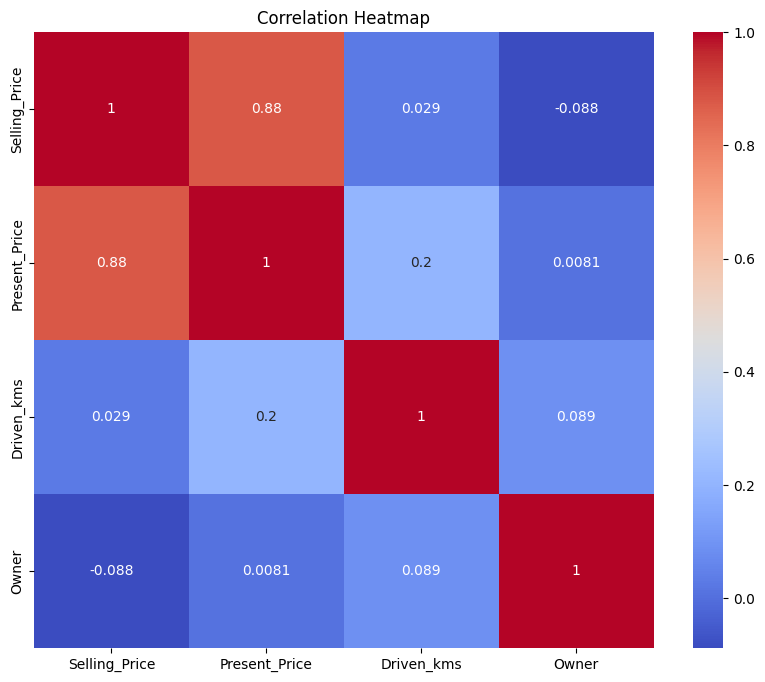

In [21]:
# Correlation Analysis
correlation_matrix = df[numerical_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Result Analysis

In [22]:
# Extract brand and model from CarName
df['brand'] = df['Car_Name'].apply(lambda x: x.split(' ')[0])
df['model'] = df['Car_Name'].apply(lambda x: ' '.join(x.split(' ')[1:]))


# Define categorical and numerical columns

numerical_columns = ['Selling_Price', 'Present_Price', 'Driven_kms',  'Owner']


categorical_columns = ['Car_Name','Fuel_Type','Selling_type','Transmission']


In [23]:


# Encoding categorical variables
label_encoder = LabelEncoder()
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])



In [24]:
# Feature engineering
df['price_ratio'] = df['Selling_Price'] / df['Present_Price']
for column in numerical_columns:
    df[f'{column}_squared'] = df[column] ** 2
df['Owner'] = np.log(df['Driven_kms'] + 1)


# Feature scaling
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Data Split

In [25]:
# Splitting the dataset
X = df.drop(['Car_Name', 'brand'], axis=1)  # Include the engineered features and CarName
y = df
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [26]:
X.head()

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,model,price_ratio,Selling_Price_squared,Present_Price_squared,Driven_kms_squared,Owner_squared
0,2014,-0.258416,-0.236256,-0.256224,2,0,1,0.083876,,0.599284,11.2225,31.2481,729000000,0
1,2013,0.017481,0.221544,0.155911,1,0,1,0.543840,,0.497904,22.5625,91.0116,1849000000,0
2,2017,0.510154,0.257472,-0.773969,2,0,1,-1.264545,,0.736041,52.5625,97.0225,47610000,0
3,2011,-0.356950,-0.403151,-0.817758,2,0,1,-1.544088,r,0.686747,8.1225,17.2225,27040000,0
4,2014,-0.012079,-0.087906,0.141743,1,0,1,0.531116,,0.669578,21.1600,47.1969,1802002500,0


In [27]:
y.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,brand,model,price_ratio,Selling_Price_squared,Present_Price_squared,Driven_kms_squared,Owner_squared
0,90,2014,-0.258416,-0.236256,-0.256224,2,0,1,0.083876,ritz,,0.599284,11.2225,31.2481,729000000,0
1,93,2013,0.017481,0.221544,0.155911,1,0,1,0.543840,sx4,,0.497904,22.5625,91.0116,1849000000,0
2,68,2017,0.510154,0.257472,-0.773969,2,0,1,-1.264545,ciaz,,0.736041,52.5625,97.0225,47610000,0
3,96,2011,-0.356950,-0.403151,-0.817758,2,0,1,-1.544088,wagon,r,0.686747,8.1225,17.2225,27040000,0
4,92,2014,-0.012079,-0.087906,0.141743,1,0,1,0.531116,swift,,0.669578,21.1600,47.1969,1802002500,0


In [28]:
# from sklearn import datasets
# from sklearn.model_selection import train_test_split
# from sklearn.svm import SVC
# from sklearn.metrics import accuracy_score

# # Create SVC model
# svc = SVC(kernel='linear')  

# # Train the SVC model
# svc.fit(X_train, y_train)

# # Make predictions on the test set
# y_pred = svc.predict(X_test)

# # Calculate accuracy
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)
